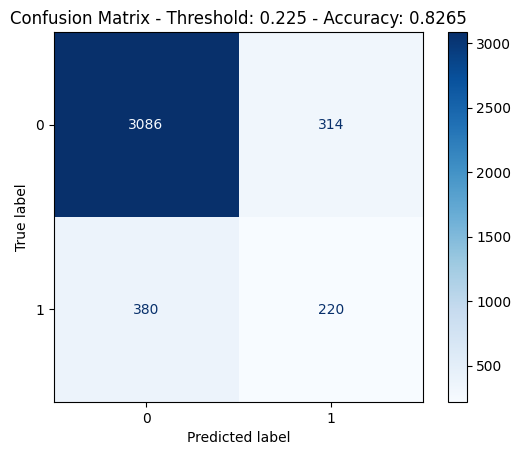

Threshold: 0.225
Accuracy: 0.8265
Classification Report:
               precision    recall  f1-score   support

           0     0.8904    0.9076    0.8989      3400
           1     0.4120    0.3667    0.3880       600

    accuracy                         0.8265      4000
   macro avg     0.6512    0.6372    0.6435      4000
weighted avg     0.8186    0.8265    0.8223      4000



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("credit_card_fraud_200k.csv")
df['Device_Type'] = LabelEncoder().fit_transform(df['Device_Type'])

# Optional: Sample to speed up
df_sample = df.sample(n=20000, random_state=42)

# Split
X = df_sample.drop('Fraud', axis=1)
y = df_sample['Fraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
rf_model = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Apply fixed threshold
threshold = 0.225
y_pred = (y_proba >= threshold).astype(int)

# Evaluate
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - Threshold: {threshold} - Accuracy: {accuracy:.4f}')
plt.show()

# Print metrics
print(f"Threshold: {threshold}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)







In [27]:
import joblib

# After training your RF model
joblib.dump(rf_model, 'rf_fraud_model.joblib')


['rf_fraud_model.joblib']